<a href="https://colab.research.google.com/github/heungsikyu/data_analysis_study/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 데이터 분석 

## 1.Time Series width Pandas

*   DateTime Index 
     - time 또는 date 정보는 별개의 칼럼이기 보다 인덱스인 경우가 많다.
     - Panda에 내장된 기능들로 DateTime 인덱스를 생성하고 활용하는 방법을 안다. 
*   Time Resampling 
     - 시계열 데이터의 인덱스는 시(hours), 분(minutes)등 작은 단위 DateTime 인덳로 이뤄진 경우가 많다. 
     - 더 넓은 주기로 데이터를 집계 해야 하는 경우 Time Resampling이 vlfdy
     - groupby 를 사용함으로써 Time Resampling을 수행할 수는 있지만, 비즈니스 도메인에서 분기나 회계년도를 편리하게 처리할 방법은 안됨
     - Pandas 는 이런 경우에 활용 할 수 있는 frequency sampling 도구를 지원 
* Time Shifiting
     - 시계열 분석 알고리즘을 사용하기 위해 데이터를 임의 시간만큼 앞 또는 뒤로 이동시켜야 할 때 사용
     - Pandas는 이런 경우에도 매우 쉬운 방법 제공
* Rolling and Expanding
     - 매일 수집되는 데이터들에는 노이즈가 포함되기도 한다.
     - 이럴 경우 데이터의 일반적인 트렌드를 구하기 위해 rolling mean(또는 moving average)을 사용하기도 한다. 
     - Pandas에 내장된 rolling 함수를 이용하면 주어진 시한 내 평균(rolling mean)등을 구할 수 있다. 
     - 임의 시간 간격에 window를 만들고 그 안에서 mean같은 통계적 aggregation을 실행 하면된다.



### 볼린저 밴드(Bollinger Band)

### Datetime Index 만들기

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
from datetime import datetime

today = datetime(2021, 1, 16, 10, 20)
today

datetime.datetime(2021, 1, 16, 10, 20)

In [47]:
today.day

16

In [48]:
today.year

2021

In [49]:
dates = [datetime(2020,1,15), datetime(2020,1,16)]
dt_index = pd.DatetimeIndex(dates)
dt_index

DatetimeIndex(['2020-01-15', '2020-01-16'], dtype='datetime64[ns]', freq=None)

In [50]:
data = np.random.randn(2,2)
cols = ['A','B']

In [51]:
df = pd.DataFrame(data=data, index=dt_index, columns=cols)
df

,A,B
2020-01-15,-0.969709,-0.594641
2020-01-16,-0.172742,-0.602479


In [52]:
df.index


DatetimeIndex(['2020-01-15', '2020-01-16'], dtype='datetime64[ns]', freq=None)

In [53]:
df.index.max()

Timestamp('2020-01-16 00:00:00')

In [54]:
df.index.min()

Timestamp('2020-01-15 00:00:00')

In [55]:
df.index.argmax()

1

In [56]:
df.index.argmin()

0

### Resampling

In [138]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Korea_Stocks_Full/005930.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5287 entries, 0 to 5286
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       5287 non-null   object
 1   Open       5287 non-null   int64 
 2   High       5287 non-null   int64 
 3   Low        5287 non-null   int64 
 4   Close      5287 non-null   int64 
 5   Volume     5287 non-null   int64 
 6   Adj_Close  5287 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 289.3+ KB


In [141]:
# Date 칼럼을 인덱스로 바꾸는 방법 1
df['Date']= df['Date'].apply(pd.to_datetime)

In [142]:
df

,Date,Open,High,Low,Close,Volume,Adj_Close
0,2000-01-04,300000,305500,283000,305500,1483900,268763
1,2000-01-05,290000,303000,276000,279000,1493600,245450
2,2000-01-06,287500,289000,279000,281000,1087800,247210
3,2000-01-07,278000,283500,268000,277000,806100,243691
4,2000-01-10,280000,288500,279000,288500,937600,253808
...,...,...,...,...,...,...,...
5282,2021-01-11,90000,96800,89500,91000,90306177,91000
5283,2021-01-12,90300,91400,87800,90600,48682416,90600
5284,2021-01-13,89800,91200,89100,89700,36068848,89700
5285,2021-01-14,88700,90000,88700,89700,26393970,89700


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5287 entries, 0 to 5286
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5287 non-null   datetime64[ns]
 1   Open       5287 non-null   int64         
 2   High       5287 non-null   int64         
 3   Low        5287 non-null   int64         
 4   Close      5287 non-null   int64         
 5   Volume     5287 non-null   int64         
 6   Adj_Close  5287 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 289.3 KB


In [74]:
df.set_index('Date', inplace=True)

In [92]:
df

,Open,High,Low,Close,Volume,Adj_Close,month
Date,,,,,,,
2000-01-04,300000,305500,283000,305500,1483900,268763,1
2000-01-05,290000,303000,276000,279000,1493600,245450,1
2000-01-06,287500,289000,279000,281000,1087800,247210,1
2000-01-07,278000,283500,268000,277000,806100,243691,1
2000-01-10,280000,288500,279000,288500,937600,253808,1
...,...,...,...,...,...,...,...
2021-01-11,90000,96800,89500,91000,90306177,91000,1
2021-01-12,90300,91400,87800,90600,48682416,90600,1
2021-01-13,89800,91200,89100,89700,36068848,89700,1


In [76]:
df['month'] = df.index.month

In [77]:
df

,Open,High,Low,Close,Volume,Adj_Close,month
Date,,,,,,,
2000-01-04,300000,305500,283000,305500,1483900,268763,1
2000-01-05,290000,303000,276000,279000,1493600,245450,1
2000-01-06,287500,289000,279000,281000,1087800,247210,1
2000-01-07,278000,283500,268000,277000,806100,243691,1
2000-01-10,280000,288500,279000,288500,937600,253808,1
...,...,...,...,...,...,...,...
2021-01-11,90000,96800,89500,91000,90306177,91000,1
2021-01-12,90300,91400,87800,90600,48682416,90600,1
2021-01-13,89800,91200,89100,89700,36068848,89700,1


In [93]:
df.groupby('month').agg(sum)

,Open,High,Low,Close,Volume,Adj_Close
month,,,,,,
1,359745650,364008050,355399450,359743800,1259085977,340201186
2,329262100,332699750,325622250,328938450,717101193,310806538
3,377486750,381764400,373735100,378082000,1178636460,357545061
4,343139260,346593860,339165480,342950920,1007525346,321927159
5,314975050,318052700,311425000,314502050,1110118027,294409881
6,319075500,322459200,315518350,318764200,1140759554,299211796
7,339866499,343773822,336340969,340143000,1011375552,319446278
8,332071347,335336092,328277431,331459600,956800195,311122830
9,308762565,312266673,305721345,309206900,981756111,290205760


In [94]:
df.groupby(df.index.year).sum()

,Open,High,Low,Close,Volume,Adj_Close,month
Date,,,,,,,
2000,69386000,70984000,67806000,69275500,263057000,60945077,1680
2001,51195000,52139000,50400500,51319000,175466100,45147817,1690
2002,89397000,90765000,88116000,89482500,204959000,78722203,1700
2003,97362000,98580000,96199500,97460500,152857900,85740870,1703
2004,126742500,128213000,125196000,126738500,142460200,111498219,1712
2005,138862000,140188500,137682000,138997000,106593979,122282654,1689
2006,158311000,159884000,156681000,158254000,96004090,139292651,1603
2007,142211000,143749000,140433000,142021000,137981462,126157071,1586
2008,147637000,149994000,145394500,147703500,143025192,133040006,1694


In [95]:
df.groupby([df.index.year, df.index.month]).sum()

Open     High      Low    Close     Volume  Adj_Close  month
Date Date                                                                 
2000 1     5750500  5877000  5647500  5763500   18050700    5070436     20
     2     5542500  5668000  5386000  5504000   21845900    4842141     42
     3     6911000  7116500  6702000  6899500   25567800    6069831     69
     4     6399000  6559500  6232500  6356500   17502500    5592129     80
     5     7225000  7402000  7109000  7229500   18949300    6360152    115
...            ...      ...      ...      ...        ...        ...    ...
2020 9     1221700  1234000  1211900  1221700  426302298    1221700    189
     10    1136900  1144600  1126000  1135000  327557687    1135000    190
     11    1324900  1344400  1312000  1331800  496431342    1331800    231
     12    1534400  1558900  1524600  1546000  529998852    1546000    252
2021 1      860600   888200   852700   869800  442186974     869800     10

[253 rows x 7 columns]

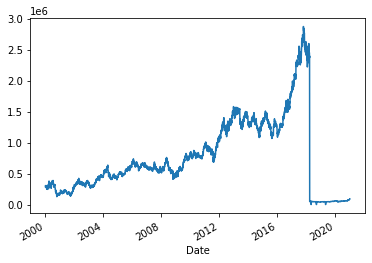

In [96]:
df['Open'].plot()

#### Resampling **Timeseries Offset aliases**
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [97]:
df.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Adj_Close,month
Date,,,,,,,
2000-12-31,2.689380e+05,2.751318e+05,2.628140e+05,2.685097e+05,1.019601e+06,2.362212e+05,6.511628
2001-12-31,1.992023e+05,2.028755e+05,1.961109e+05,1.996848e+05,6.827475e+05,1.756724e+05,6.575875
2002-12-31,3.425172e+05,3.477586e+05,3.376092e+05,3.428448e+05,7.852835e+05,3.016176e+05,6.513410
2003-12-31,3.730345e+05,3.777011e+05,3.685805e+05,3.734119e+05,5.856625e+05,3.285091e+05,6.524904
2004-12-31,4.837500e+05,4.893626e+05,4.778473e+05,4.837347e+05,5.437412e+05,4.255657e+05,6.534351
2005-12-31,5.361467e+05,5.412683e+05,5.315907e+05,5.366680e+05,4.115598e+05,4.721338e+05,6.521236
2006-12-31,6.383508e+05,6.446935e+05,6.317782e+05,6.381210e+05,3.871133e+05,5.616639e+05,6.463710
2007-12-31,5.780935e+05,5.843455e+05,5.708659e+05,5.773211e+05,5.609003e+05,5.128336e+05,6.447154
2008-12-31,5.744630e+05,5.836342e+05,5.657374e+05,5.747218e+05,5.565183e+05,5.176654e+05,6.591440


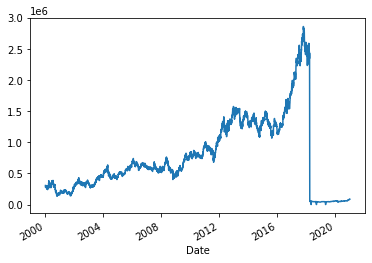

In [98]:
df['Close'].plot()

In [84]:
def first_day(sample):
  return sample(0)

In [86]:
df.resample(rule='A').apply()
df

TypeError: ignored

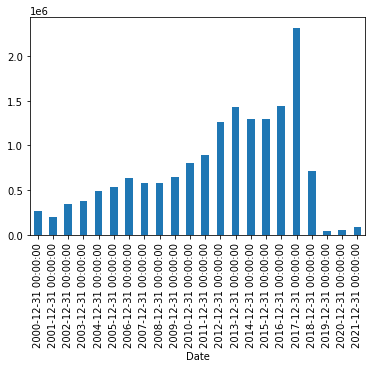

In [99]:
df['Close'].resample(rule='A').mean().plot(kind='bar')

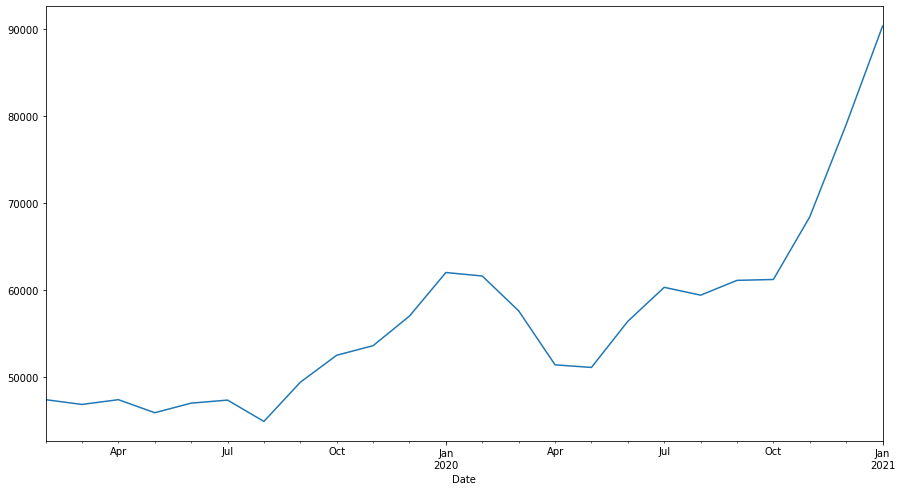

In [103]:
# 오픈 가격의 월별 최대값을 bar차트로 그려라
df['Open']['2019-2' : '2021-1'].resample(rule='M').max().plot(figsize=(15,8))

In [108]:
# 적용된 기간의 비즈니스일 뽑아내기 
daily_daterange = pd.date_range(start=datetime(2020,9,1), end=datetime(2021,1,15), freq='B')

daily_daterange


DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-12', '2020-10-13', '2020-10-14',
               '2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-26',
               '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30',
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-16', '2020-11-17',
      

In [111]:
# 적용된 비즈니스일에 대한 랜덤 데이터 만들기 
daily_dataset = pd.DataFrame(data={'value': np.random.rand(len(daily_daterange))}, index=daily_daterange)
daily_dataset

,value
2020-09-01,0.379234
2020-09-02,0.636163
2020-09-03,0.457636
2020-09-04,0.577140
2020-09-07,0.578652
...,...
2021-01-11,0.590981
2021-01-12,0.717533
2021-01-13,0.455869
2021-01-14,0.006866


In [112]:
# 데이터 중 주중 월요일의 최소값 뽑기
daily_dataset.resample('W-MON').min()

,value
2020-09-07,0.379234
2020-09-14,0.004671
2020-09-21,0.134522
2020-09-28,0.075612
2020-10-05,0.348968
2020-10-12,0.123900
2020-10-19,0.181979
2020-10-26,0.204577
2020-11-02,0.068921
2020-11-09,0.043324


In [113]:
# calendar month end 의 최소값
daily_dataset.resample('M').min()

,value
2020-09-30,0.004671
2020-10-31,0.068921
2020-11-30,0.020219
2020-12-31,0.022485
2021-01-31,0.006866


In [115]:
daily_dataset.resample('M').min()

,value
2020-09-30,0.004671
2020-10-31,0.068921
2020-11-30,0.020219
2020-12-31,0.022485
2021-01-31,0.006866


### Shifting 

In [150]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Korea_Stocks_Full/005930.csv', index_col='Date')


In [151]:
df.index

Index(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-10',
       '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14', '2000-01-17',
       ...
       '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15'],
      dtype='object', name='Date', length=5287)

In [152]:
# Date 인덱스 칼럼을 Datetime으로  바꾸는 방법
# df['Date']= df['Date'].apply(pd.to_datetime)
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15'],
              dtype='datetime64[ns]', name='Date', length=5287, freq=None)

In [153]:
df.head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2000-01-04,300000,305500,283000,305500,1483900,268763
2000-01-05,290000,303000,276000,279000,1493600,245450
2000-01-06,287500,289000,279000,281000,1087800,247210
2000-01-07,278000,283500,268000,277000,806100,243691
2000-01-10,280000,288500,279000,288500,937600,253808


In [154]:
temp = np.array(df['Close'])

In [161]:
temp

array([305500, 279000, 281000, ...,  89700,  89700,  88000])

In [162]:
df.shift(1).head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,300000.0,305500.0,283000.0,305500.0,1483900.0,268763.0
2000-01-06,290000.0,303000.0,276000.0,279000.0,1493600.0,245450.0
2000-01-07,287500.0,289000.0,279000.0,281000.0,1087800.0,247210.0
2000-01-10,278000.0,283500.0,268000.0,277000.0,806100.0,243691.0


In [160]:
df.shift(-1).head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2000-01-04,290000.0,303000.0,276000.0,279000.0,1493600.0,245450.0
2000-01-05,287500.0,289000.0,279000.0,281000.0,1087800.0,247210.0
2000-01-06,278000.0,283500.0,268000.0,277000.0,806100.0,243691.0
2000-01-07,280000.0,288500.0,279000.0,288500.0,937600.0,253808.0
2000-01-10,291000.0,305000.0,288500.0,288500.0,1194900.0,253808.0


In [164]:
df.shift(-1).tail()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2021-01-11,90300.0,91400.0,87800.0,90600.0,48682416.0,90600.0
2021-01-12,89800.0,91200.0,89100.0,89700.0,36068848.0,89700.0
2021-01-13,88700.0,90000.0,88700.0,89700.0,26393970.0,89700.0
2021-01-14,89800.0,91800.0,88000.0,88000.0,32997656.0,88000.0
2021-01-15,NaN,NaN,NaN,NaN,NaN,NaN


### lagging,  lag, lagged  

In [173]:
# 한달 데이터를 뒤로 미루기 
df.shift(freq='M', periods=2)


,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2000-02-29,300000,305500,283000,305500,1483900,268763
2000-02-29,290000,303000,276000,279000,1493600,245450
2000-02-29,287500,289000,279000,281000,1087800,247210
2000-02-29,278000,283500,268000,277000,806100,243691
2000-02-29,280000,288500,279000,288500,937600,253808
...,...,...,...,...,...,...
2021-02-28,90000,96800,89500,91000,90306177,91000
2021-02-28,90300,91400,87800,90600,48682416,90600
2021-02-28,89800,91200,89100,89700,36068848,89700


### Rolling & Expanding

In [184]:
# parse_dates=True로 하면 데이터를 확인해서 인덱스 컬럼의 데이터 타입을 datetime으로 변환한다.  
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Korea_Stocks_Full/005930.csv', index_col="Date", parse_dates=True)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Korea_Stocks_Full/005930.csv', index_col="Date", parse_dates=['Date'])

In [185]:
df.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15'],
              dtype='datetime64[ns]', name='Date', length=5287, freq=None)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5287 entries, 2000-01-04 to 2021-01-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Open       5287 non-null   int64
 1   High       5287 non-null   int64
 2   Low        5287 non-null   int64
 3   Close      5287 non-null   int64
 4   Volume     5287 non-null   int64
 5   Adj_Close  5287 non-null   int64
dtypes: int64(6)
memory usage: 289.1 KB


In [196]:
def dateparser(str_dt):
  return pd.datetime.strptime(str_dt, '%Y-%m-%d')
  

In [197]:
dateparser('2019-01-01')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


datetime.datetime(2019, 1, 1, 0, 0)

In [214]:
# 파싱이 안되는 컬럼의 경우 
# 2020-JAN-01 이런 경우 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Korea_Stocks_Full/005930.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [215]:
df

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2000-01-04,300000,305500,283000,305500,1483900,268763
2000-01-05,290000,303000,276000,279000,1493600,245450
2000-01-06,287500,289000,279000,281000,1087800,247210
2000-01-07,278000,283500,268000,277000,806100,243691
2000-01-10,280000,288500,279000,288500,937600,253808
...,...,...,...,...,...,...
2021-01-11,90000,96800,89500,91000,90306177,91000
2021-01-12,90300,91400,87800,90600,48682416,90600
2021-01-13,89800,91200,89100,89700,36068848,89700


In [207]:
# 샘플 윈도우를 7개짜리를 만들어서 각각  샘플링을 한다. 
# 각 샘플별로 7개의 데이터가 들어온다.
# 각 샘플 7개의 윈도우의 mean을 구해 본다. 
# 
df.rolling(7).mean().head(10)
# 무빙 에러리지 트렌드를 구하기 위해서 많이 사용한다. 

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-12,286714.285714,294500.000000,279071.428571,286500.000000,1.084043e+06,252048.285714
2000-01-13,283857.142857,291857.142857,278357.142857,283642.857143,9.897429e+05,249534.714286
2000-01-14,283285.714286,290571.428571,279500.000000,285428.571429,9.174429e+05,251105.714286


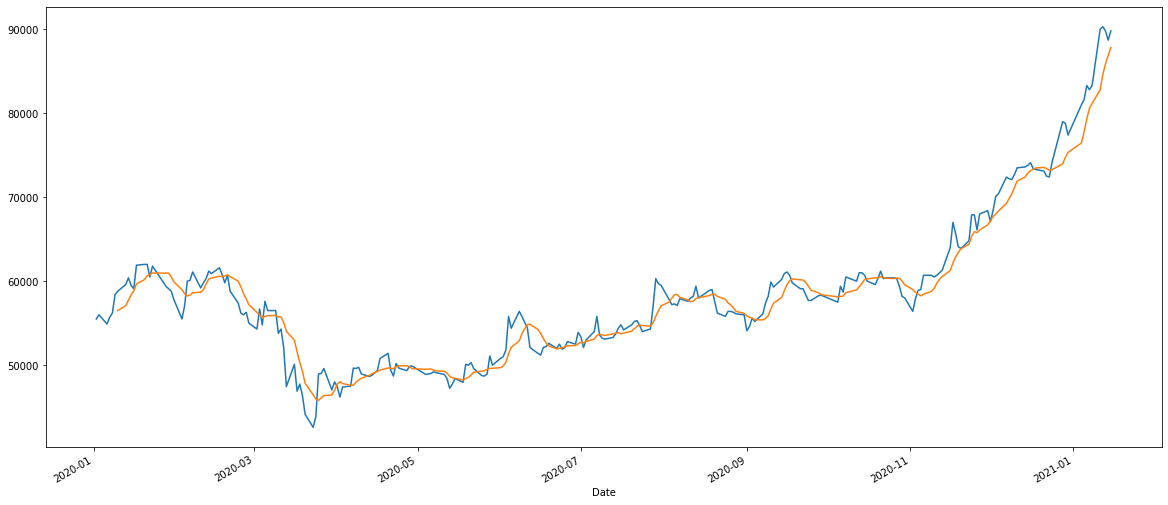

In [232]:
df['2020':]['Open'].plot()
df['2020':].rolling(7).mean()['Open'].plot(figsize=(20,9))

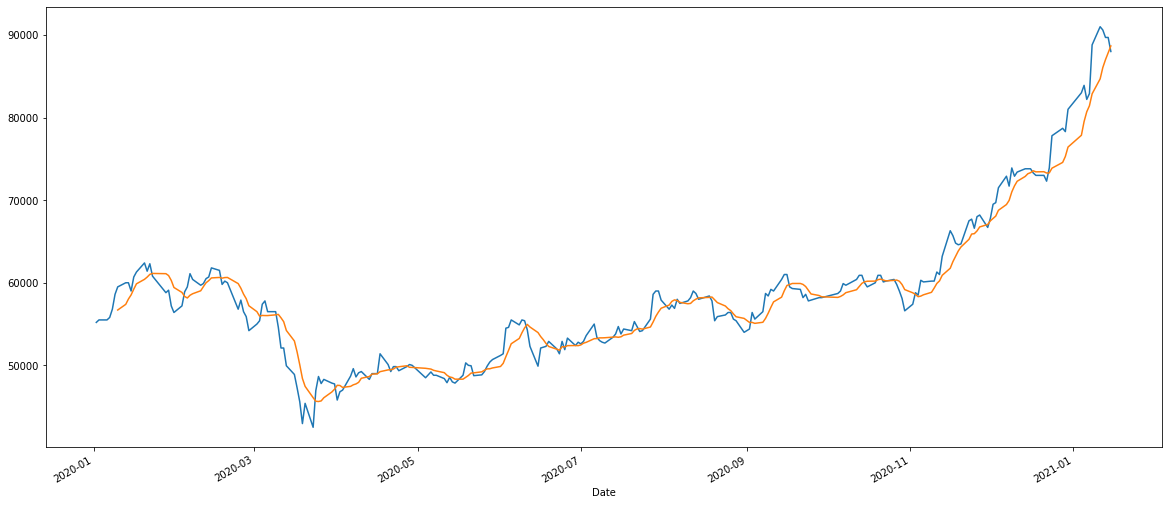

In [233]:
#주식의 마감가격의 트렌드를 보고 싶을 경우 
df['2020':]['Close'].plot()
df['2020':].rolling(window=7).mean()['Close'].plot(figsize=(20, 9))

In [238]:
# 
df['Close: 30Day Mean'] = df['Close'].rolling(30).mean()


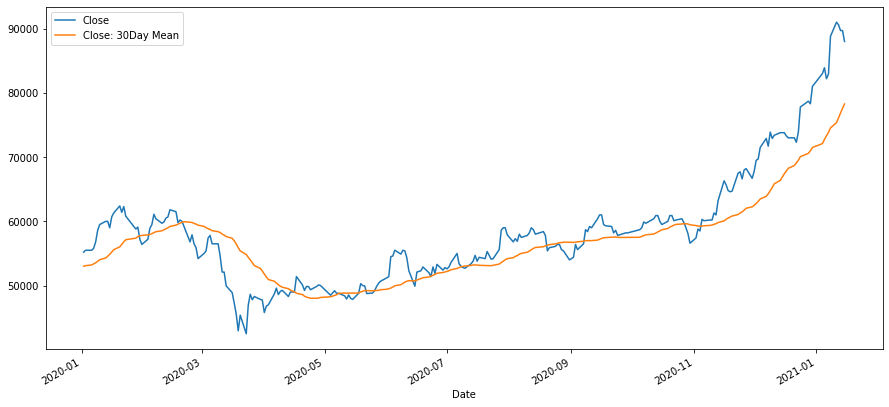

In [241]:
df['2020':][['Close','Close: 30Day Mean']].plot(figsize=(15,7))

### Expanding 


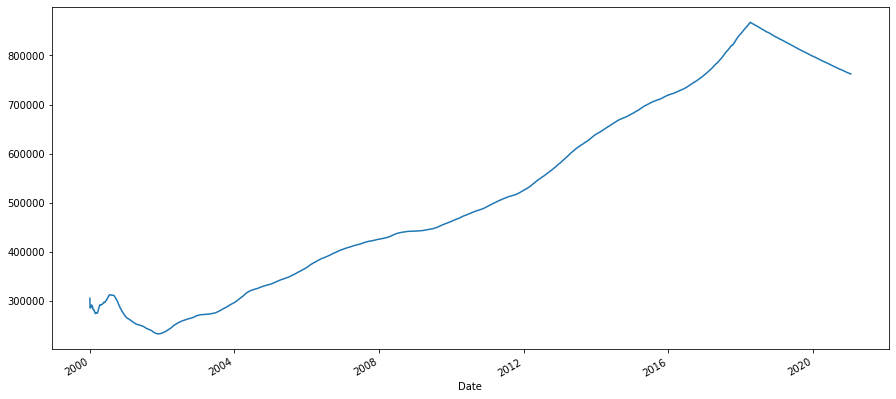

In [243]:
# periods 에 대한 누적 평균 
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,7))
#누적 평균이기때문에 계속 늘어난다

### 볼린저 밴드 그리기 
 종가 기준 20일 단위의 평균 트랜드값

In [ ]:
#df['Close'] std 2 -2 20MA 

In [245]:
df['Close: 20Day Mean'] = df['Close'].rolling(window=20).mean()

In [246]:
df['Upper'] = df['Close: 20Day Mean'] + 2*df['Close'].rolling(20).std()
df['Lower'] = df['Close: 20Day Mean'] - 2*df['Close'].rolling(20).std()

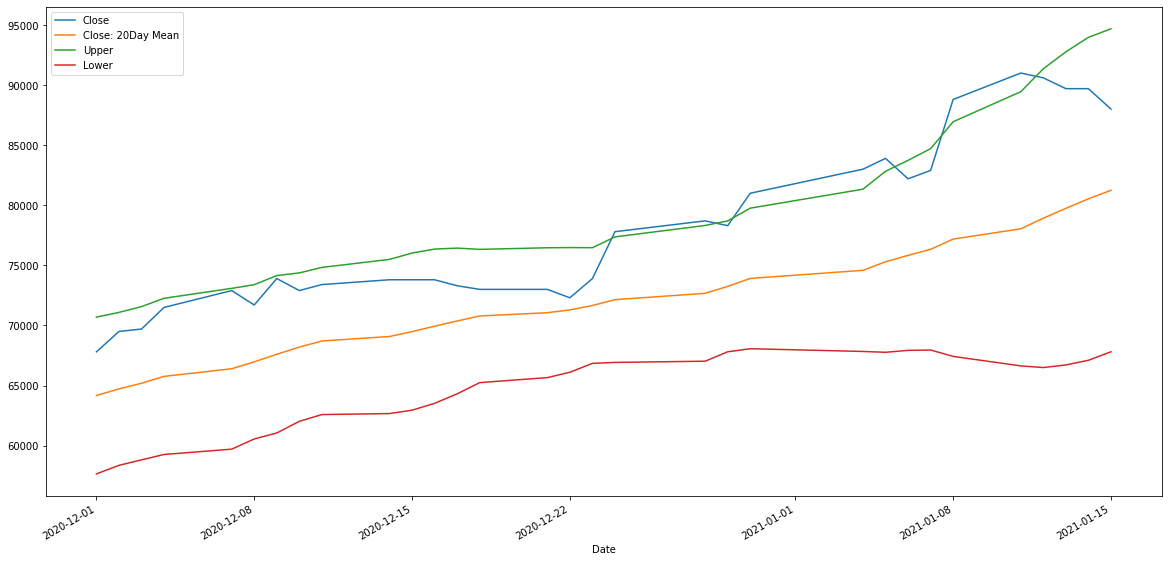

In [251]:
df['2020-12':][['Close','Close: 20Day Mean', 'Upper', 'Lower']].plot(figsize=(20,10))

## 2.TimeZone, Visualizing

> 들여쓴 블록

```
# 코드로 형식 지정됨
```


1.   항목 추가

> 들여쓴 블록


2.   항목 추가






## 3.시계열 데이터 특성 및 ETS 모델

### ETS 모델 
 Error, Trend, Seanonality 요소들을 활용하는데 각각을 더하거나 곱하여 Smoothing한다
 이것들을 가지고 시계열 데이터 모델링을 할수 있다. 

 

*   ETS Decompostition - Airline Passengers




In [40]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 3.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [42]:
data = [i+np.random.randint(10 ) for i in range(1, 100)]

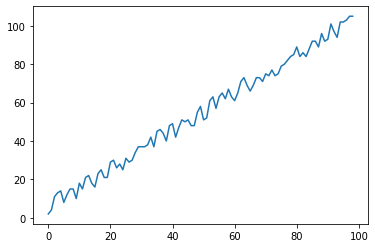

In [43]:
series = pd.Series(data)
series.plot()

### Additive Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


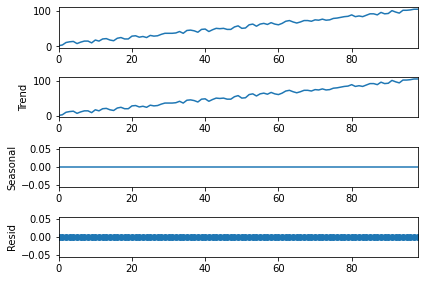

In [44]:
result = seasonal_decompose(series, model='additive', freq=1)
result.plot();

In [62]:
def plot_decompose(decomposeresult):
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
  decomposeresult.observed.plot(legend=False, ax=ax1)
  ax1.set_ylabel('Observerd')
  decomposeresult.trend.plot(legend=False, ax=ax2)
  ax2.set_ylabel('Trend')
  decomposeresult.seasonal.plot(legend=False, ax=ax3)
  ax3.set_ylabel('Seansonal')
  decomposeresult.resid.plot(legend=False, ax=ax4)
  ax4.set_ylabel('Resid')

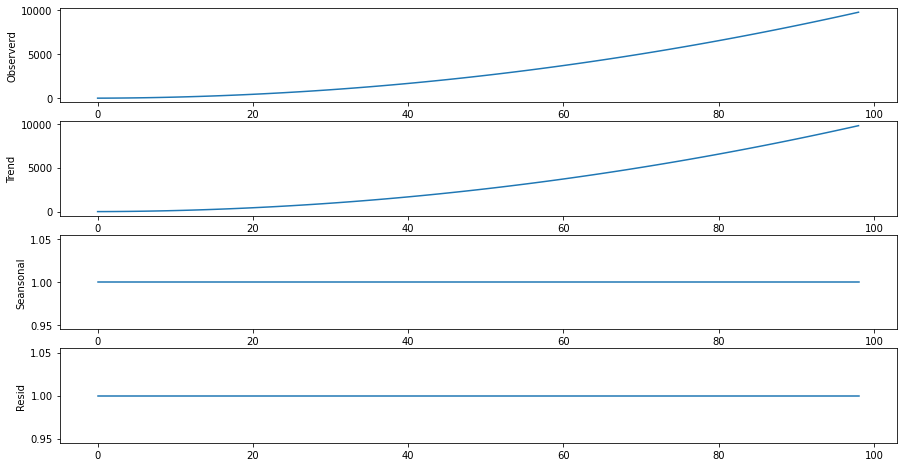

In [67]:
plot_decompose(result)

 ### multiplicative Model
  y_t = Level * Error *  Trend * Seasonality

  log(y_t) = Level + Error + Trend +Seansonality

# 새 섹션

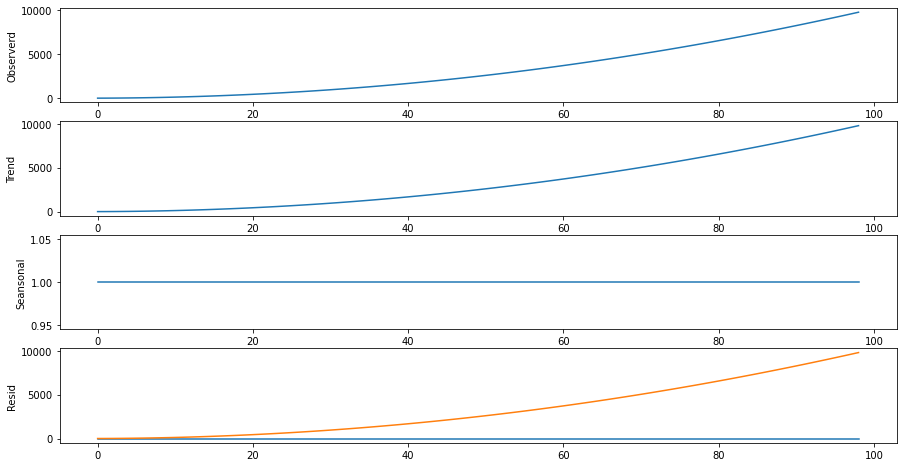

In [76]:
data = [i**2 for i in range(1,100)]
series1 = pd.Series(data)

result1 = seasonal_decompose(series1, model='muliplicative', freq=1)

plot_decompose(result1)

series.plot()

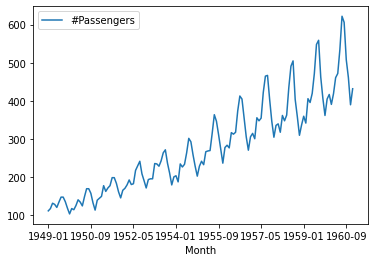

In [77]:
airline = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirPassengers.csv', index_col='Month' )
airline.plot()

In [78]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


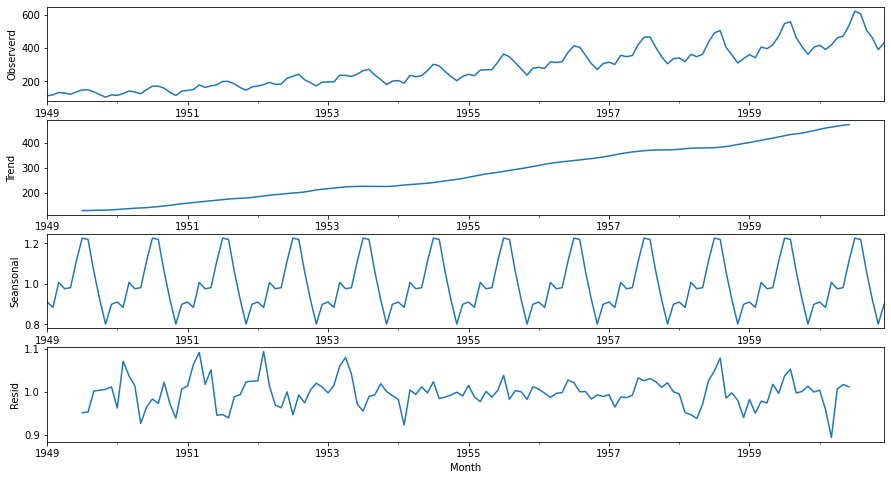

In [79]:
result = seasonal_decompose(airline['#Passengers'], model='multiplicative')
plot_decompose(result)